In [1]:
# O tratamento de dados desbalanceados serve para quando temos uma quantidade
# muito grande de registros em uma classe e poucos registros de outra classe

Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_census = pd.read_csv('census.csv')
base_census.head()

,age,workclass,final_weight,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,yearly_income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
np.unique(base_census['yearly_income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719,  7841], dtype=int64))

In [5]:
base_census['yearly_income'].value_counts()
# Dados desbalanceados pois existem muito mais elementos na primeira classe [ <=50K    24719]

 <=50K    24719
 >50K      7841
Name: yearly_income, dtype: int64

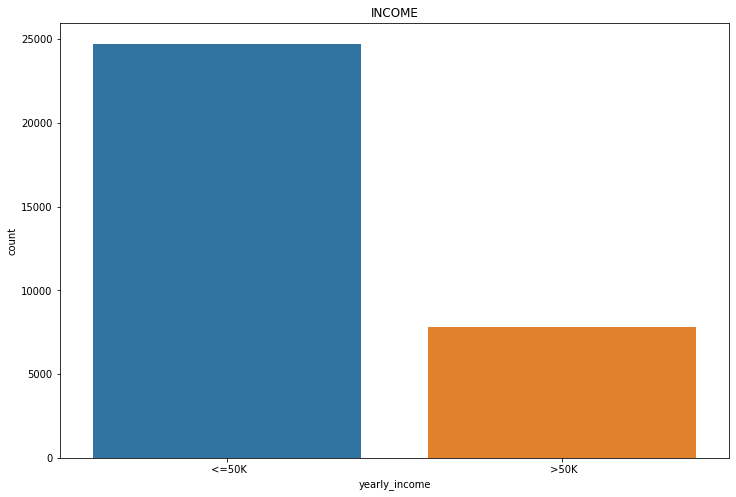

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x='yearly_income', data=base_census)
plt.title('INCOME')
plt.show()

In [7]:
# Atributos previsores
X_census = base_census.drop(columns='yearly_income', axis=1)
X_census.head()

,age,workclass,final_weight,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [8]:
X_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   final_weight     32560 non-null  int64 
 3   education        32560 non-null  object
 4   education_num    32560 non-null  int64 
 5   maritial_status  32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   sex              32560 non-null  object
 10  capital_gain     32560 non-null  int64 
 11  capital_loss     32560 non-null  int64 
 12  hours_per_week   32560 non-null  int64 
 13  native_country   32560 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [9]:
# O que iremos prever
y_census = base_census['yearly_income'].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [10]:
# Utliziando LabelEncoder para tratarmos atributos categoricos
from sklearn.preprocessing import LabelEncoder
X_census = X_census.apply(LabelEncoder().fit_transform).values
X_census

array([[   33,     6,  2925, ...,     0,    12,    39],
       [   21,     4, 14085, ...,     0,    39,    39],
       [   36,     4, 15335, ...,     0,    39,    39],
       ...,
       [   41,     4,  7882, ...,     0,    39,    39],
       [    5,     4, 12880, ...,     0,    19,    39],
       [   35,     5, 17824, ...,     0,    39,    39]], dtype=int64)

Subamostragem com Tomek Links

In [11]:
# !pip install -U imbalanced-learn
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [12]:
X_under.shape, y_under.shape

((30473, 14), (30473,))

In [13]:
# Contagem de elementos da base de dados original
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719,  7841], dtype=int64))

In [14]:
# # Contagem de elementos da nova base de dados 
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22632,  7841], dtype=int64))

In [15]:
# Aplicando OneHotEncoder para fazermos a transformacao dos atributos categoricos

# O One Hot Enconding irá gerar vetores binários para cada valor inteiro.
# Dessa forma resolvemos o problema que o LabelEncoding criou, pois, os vetores
# binários não significam nada. Cada valor inteiro, agora é representado por um vetor binário único.
from sklearn.preprocessing import OneHotEncoder

# O ColumnTransformer é uma classe na biblioteca de aprendizado de máquina Python
# scikit-learn que permite aplicar seletivamente transformações de preparação de dados.
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder.fit_transform(X_census).toarray()
X_census

array([[  0.,   0.,   0., ...,   0.,   0.,  12.],
       [  0.,   0.,   0., ...,   0.,   0.,  39.],
       [  0.,   0.,   0., ...,   0.,   0.,  39.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  39.],
       [  0.,   0.,   0., ...,   0.,   0.,  19.],
       [  0.,   0.,   0., ..., 108.,   0.,  39.]])

In [16]:
X_census.shape

(32560, 108)

In [17]:
# Dividindo a base de dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_census, y_census, test_size=0.15, random_state=0)
X_train_under.shape, X_test_under.shape

((27676, 108), (4884, 108))

In [18]:
# utilizando o Random Forest
from sklearn.ensemble import RandomForestClassifier
randon_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
randon_forest_census.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [19]:
# Observando os Resultados
from sklearn.metrics import classification_report, confusion_matrix
previsoes = randon_forest_census.predict(X_test_under)
print(classification_report(y_test_under, previsoes))
print(confusion_matrix(y_test_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3759
        >50K       0.74      0.63      0.68      1125

    accuracy                           0.86      4884
   macro avg       0.82      0.78      0.80      4884
weighted avg       0.86      0.86      0.86      4884

[[3507  252]
 [ 419  706]]


Sobreamostragem com SMOTE 

In [20]:
# Precisamos carregar a base de dados novamente para essa parte
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [21]:
X_over.shape

(49438, 108)

In [22]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719,  7841], dtype=int64))

In [23]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719, 24719], dtype=int64))

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder.fit_transform(X_over).toarray()
X_census

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 12.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 39.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 39.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        46.63965707, 39.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 64.22034659],
       [ 1.        ,  0.        ,  0.        , ..., 96.052832  ,
         0.        , 39.        ]])

In [25]:
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_train_over.shape, X_test_over.shape

((42022, 108), (7416, 108))

In [26]:
# utilizando o Random Forest
from sklearn.ensemble import RandomForestClassifier
randon_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
randon_forest_census.fit(X_train_over, y_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [27]:
# Observando os Resultados com oversampling
from sklearn.metrics import classification_report, confusion_matrix
previsoes = randon_forest_census.predict(X_test_over)
print(classification_report(y_test_over, previsoes))
print(confusion_matrix(y_test_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      3684
        >50K       0.92      0.89      0.90      3732

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

[[3403  281]
 [ 418 3314]]
